# Research on car sales ads

There is an online car marketplace where hundreds of free vehicle advertisements are published every day.

There are data about the characteristics of the vehicle, such as model, year of manufacture, current condition, vehicle mileage, as well as such characteristics of the ad as the date of publication and the days listed, as well as the price of the vehicle.

The purpose of the study: to conduct an EDA and determine which factors influence the price of a vehicle. 

The Work Plan:

<a href='#section1'>1. Getting the data and study the general information</a>

<a href='#section2'>2. Data Preprocessing</a>
* <a href='#section2.1'>2.1 Processing missing values</a>
* <a href='#section2.2'>2.2 Data type replacement</a>

<a href='#section3'>3. Additional calculations</a>

<a href='#section4'>4. Exploratory data analysis</a>

<a href='#section5'>5. Overall Conclusion</a>

In [1]:
#importing of libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

#some global constats for formatting the output string
BOLD = '\033[1m'
END = '\033[0m'

#function to convert series of string dates to datetime types
def convert_to_datetime(str_dates):
    return pd.to_datetime(str_dates, format='%Y-%m-%d')

## 1. Getting the data and study the general information 
<a id='section1'></a>

In [2]:
#reading a file that contains advertisements data 
data = pd.read_csv('/datasets/vehicles_us.csv')

#looking at the data's general information. 
print(BOLD + 'General information:' + END)
print(data.info())
print()

#looking at the first few rows in a table
print(BOLD + 'The first few rows in a dataset:' + END)
data.head()

General information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB
None

The first few rows in a dataset:


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


*The table contains __51525 rows__ for __13 features__.* 

*There are __missing values__ in the columns of `'model_year'`,  `'cylinders'`, `'odometer'`, `'paint_color'` and `'is_4wd'`.*

*For the columns `'model_year'`, `'cylinders'` and `'is_4wd'` __float64__ is used. It looks like `'model_year'`
and `'cylinders'` contain integer values and for `'is_4wd'` it would be enough boolean type. For the columns `'days_listed'` __int64__ is used. This seems excessive and would be enough __int16__. For the `'date_posted'` column, it's nessecary to change the type to __datetime__ to make it convenient to work with it.*

In [3]:
#Let's look at numerical and categorical features in more detail
#creating the corresponding lists
numeric_cols = ['price', 'model_year', 'odometer', 'date_posted', 'days_listed']
categorical_cols = ['model', 'condition', 'cylinders', 'fuel',\
                    'transmission', 'type', 'paint_color', 'is_4wd']

#looking at the values that take numerical features 
print(BOLD + 'The values that take numerical features:' + END)
print(BOLD + "Rem.:" + END + "'date_posted' is assigned to numeric features to see min and max values")
print()
print(data[numeric_cols].agg(['min', 'max', 'mean', 'median']).T)
print('\n')

#Let's look at the values that take categorical features 
print(BOLD + 'The values that take categorical features:' + END)
print(BOLD + "Rem.:" + END + "'cylinders' is assigned to categorical features to see a set of values" +\
          "although the values of this feature can be compared")
print()
pd.set_option('display.max_colwidth', -1)
data[categorical_cols].agg(['unique']).T

The values that take numerical features:
Rem.:'date_posted' is assigned to numeric features to see min and max values

                    min         max     mean  median
price                 1      375000  12132.5    9000
model_year         1908        2019  2009.75    2011
odometer              0      990000   115553  113000
date_posted  2018-05-01  2019-04-19      NaN     NaN
days_listed           0         271  39.5548      33


The values that take categorical features:
Rem.:'cylinders' is assigned to categorical features to see a set of valuesalthough the values of this feature can be compared



,unique
model,"[bmw x5, ford f-150, hyundai sonata, chrysler 200, chrysler 300, toyota camry, honda pilot, kia sorento, chevrolet silverado 1500, honda accord, ram 1500, gmc yukon, jeep cherokee, chevrolet traverse, hyundai elantra, chevrolet tahoe, toyota rav4, chevrolet silverado, jeep wrangler, chevrolet malibu, ford fusion se, chevrolet impala, chevrolet corvette, jeep liberty, toyota camry le, nissan altima, subaru outback, toyota highlander, dodge charger, toyota tacoma, chevrolet equinox, nissan rogue, mercedes-benz benze sprinter 2500, honda cr-v, jeep grand cherokee, toyota 4runner, ford focus, honda civic, kia soul, chevrolet colorado, ford f150 supercrew cab xlt, chevrolet camaro lt coupe 2d, chevrolet cruze, ford mustang, chevrolet silverado 3500hd, nissan frontier crew cab sv, subaru impreza, jeep grand cherokee laredo, nissan versa, ford f-250 sd, chevrolet silverado 1500 crew, ford f250 super duty, chevrolet camaro, ford mustang gt coupe 2d, subaru forester, ford explorer, ford f-350 sd, ford edge, nissan maxima, ford f-250, nissan sentra, ford f150, chevrolet suburban, ford expedition, dodge grand caravan, ford taurus, acura tl, ford f350 super duty, ford ranger, gmc sierra, hyundai santa fe, ford escape, gmc sierra 2500hd, honda civic lx, gmc sierra 1500, honda odyssey, cadillac escalade, volkswagen jetta, toyota corolla, chrysler town & country, volkswagen passat, toyota prius, buick enclave, ford fusion, toyota tundra, ram 3500, ram 2500, nissan frontier, chevrolet silverado 2500hd, jeep wrangler unlimited, ford f-250 super duty, gmc acadia, toyota sienna, ford focus se, ford f250, dodge dakota, ford f350, chevrolet trailblazer, ford econoline, nissan murano]"
condition,"[good, like new, fair, excellent, salvage, new]"
cylinders,"[6.0, 4.0, 8.0, nan, 5.0, 10.0, 3.0, 12.0]"
fuel,"[gas, diesel, other, hybrid, electric]"
transmission,"[automatic, manual, other]"
type,"[SUV, pickup, sedan, truck, coupe, van, convertible, hatchback, wagon, mini-van, other, offroad, bus]"
paint_color,"[nan, white, red, black, blue, grey, silver, custom, orange, yellow, brown, green, purple]"
is_4wd,"[1.0, nan]"


*The dataset contains ads __from May 2018 to April 2019__. The ad hangs on __in average for a little over a month__.*

*The __\$ 1__ minimum __price__ looks __inadequate__, as well as the __\$ 375,000__ maximum __price__ looks __enormous__ . Moreovere the average is greater than the median. This implies that `'price'` feature has __outliers with large values__.*

*The __model year 1908__ also looks __strange__, unless it is the first famous production car Ford T. But we don't have that in the list of models. Moreovere the average is less than the median. Other __outliers__ can be observed __in the early years__.*

*There is quite __a large number of values__ for the __categorical__ feature `'model'`. It would be interesting to see __how__ the vehicle __brand__ (matches the first word in the model name) __affects__ the price and other features. It seems that there should be some connection.*

*The variable `'is_4wd'` takes only two values: 1 and __NaN__. It turns out that __the unknown value corresponds to non-four-wheel drive vehicles__. Perhaps there was a checkbox in the form, in which the owners marked if the car is 4WD. And if there was no mark, then the value is acctually not known. It can be assumed that the value is skipped only for cars without 4WD. It makes sense to __replace__ the __NaN__ values __with 0__. We can use __boolean type__ for it.*

*In addition, the values for the columns `'days_listed'` are such that the type __int16__ would be enough for it. The column `'cylinders'` indeed contains __integer values__. The type __Int8__ would be enough for it.*

*The columns `'cylinders'` and `'paint_color'` contains __unknown values__ and they are represented by the value __NaN__ in the table. It does not look like these values can be restored from other fields, for example, the model does not contain information about them.*

### Conclusions

The dataset contains __51525 advertisements__ for the sale of vehicles published over a period of __almost two years__. Each ad consists of __9 obligatory fields__ and __4 fields__ that are __not filled in all ads__.

The following __problems in the data__ could be identified:
* unknown values for some features
* there are inadequately low and high prices
* surprisingly old cars (there are ads for the sale of a vehicle that is 110 years old, see the minimum value of the `'model_year'` feature)
* non-four-wheel drive vehicles have NaN values in `'is_4wd'` column

Thus, it is __necessary to fill in the gaps__ where it's possible and __to look at the distribution of features with odd values__ and __to filter out outliers__.

In addition, the type of the columns `'days_listed'` and `'model_year'` can be converted to the type __int16__, the type of `'cylinders'` to __int8__ , the type of `'date_posted'` to __datetime__ and the type of `'is_4wd'` to __bool__. It makes sense to add an __additional feature__ that corresponds to the __brand__ of the vehicle.

<a id='section2'></a>
## 2. Data preprocessing

<a id='section2.1'></a>
### 2.1 Processing missing values

In [4]:
#looking at the number and percentage of missing values per column
pd.DataFrame({'missing_number': data.isnull().sum(),
              'missing_percent': round(data.isnull().sum() * 100 / len(data), 1)})\
    .query('missing_number > 0')

,missing_number,missing_percent
model_year,3619,7.0
cylinders,5260,10.2
odometer,7892,15.3
paint_color,9267,18.0
is_4wd,25953,50.4


*__Half__ of the vehicles are __not four-wheel drive__. Let's just __fill__ those gaps __with zero__ as a flag for them.*

*Quite __large percentage of values__ are also __missing__ in the columns `'model_year'`,  `'cylinders'`, `'odometer'`, `'paint_color'`. Perhaps these are not obligatory fields on the form. Or there are some reasons for these missing values. The number of cylinders can be undefined in the case of electric cars. Odometer may not be filled for vehicles without mileage. It may be that a particular color was incorrectly exported and formed all the gaps in the corresponding column. This can be checked.*

In [5]:
#filling gaps in the is_4wd column
data['is_4wd'].fillna(0, inplace=True)

*The missing values in the column is_4wd were filled.*

In [6]:
#looking at cylinders values for ecectric cars:
data[data.fuel=='electric'].cylinders.value_counts(dropna=False)

NaN     2
4.0     1
6.0     1
8.0     1
10.0    1
Name: cylinders, dtype: int64

*There are a few electric cars and some of them have non-electric motors. It is strange that electric cars with a conventional motor do not correspond to the fuel of hybrid, perhaps the owners of the cars did not fill out the ad fields accurately. Thus, gaps in the `'cylinders'` are not associated with the absence of a conventional motor.*

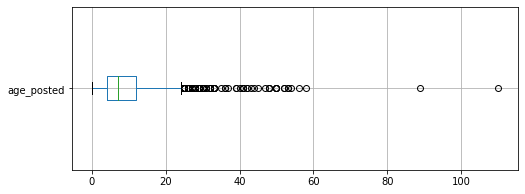

In [7]:
#Let's look at age of vehicles with gaps in the odometer field in ads:
#Createing a column with vehicle's age (in years) when the ad was placed
data['age_posted'] = (convert_to_datetime(data.date_posted).dt.year - data.model_year).astype('Int16')

#Looking at what values are taken by age of vehicle with unknown odometer values
data[data.odometer.isnull()].boxplot('age_posted', vert=False, figsize=(8, 3));

*Most vehicles with unknown odometer values are not new at all, on average they are almost 10 years old. Thus, gaps in the `'odometer'` are not due to the fact that the car is new.*

In [8]:
#Let's look at frequency of diffrent colors or possible lack of some color 
data.paint_color.value_counts()

white     10029
black     7692 
silver    6244 
grey      5037 
blue      4475 
red       4421 
green     1396 
brown     1223 
custom    1153 
yellow    255  
orange    231  
purple    102  
Name: paint_color, dtype: int64

*It looks like there are no lacking colors, which would be as popular as white or black (the number of missing values is comparable to the number of vehicles of the most popular colors).*

#### Conclusions

__Missing values__ in 'is_4wd' __were filled in with zero__ according to the context.

There are __missing values__ in the columns of `'model_year'`,  `'cylinders'`, `'odometer'`, `'paint_color'`, that most likely __cannot be restored from other fields__. It makes sense to contact the developer who sent the source file to clarify possible reasons for gaps: perhaps these are just optional fields or it was an error. 

<a id='section2.2'></a>
### 2.2 Data type replacement

In [9]:
#converting excess type with help of astype() method:
data['is_4wd'] = data.is_4wd.astype('bool') 
data['days_listed'] = data.days_listed.astype('int16') 
data['model_year'] = data.model_year.astype('Int16') #For convert column to nullable integers
data['cylinders'] = data.cylinders.astype('Int8') #For convert column to nullable integers
data['date_posted'] = pd.to_datetime(data.date_posted, format='%Y-%m-%d') 

##looking at the data's general information including data types  
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
price           51525 non-null int64
model_year      47906 non-null Int16
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null Int8
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          51525 non-null bool
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int16
age_posted      47906 non-null Int16
dtypes: Int16(2), Int8(1), bool(1), datetime64[ns](1), float64(1), int16(1), int64(1), object(6)
memory usage: 4.1+ MB


*Excess types for columns `'is_4wd'`, `'days_listed'`, `'model_year'`, `'cylinders'` were converted to appropriate ones. The amount of memory used has decreased.
The type for the `'date_posted'` column was changed to datetime to make it convenient to work with it.*

<a id='section3'></a>
## 3. Additional calculations

In [10]:
#Let's add to the table day of the week, month, and year the ad was placed
data['weekday_posted'] = data.date_posted.dt.weekday
data['month_posted'] = data.date_posted.dt.month
data['year_posted'] = data.date_posted.dt.year
#Calulating the vehicle's average mileage per year (notice: we have not to calculate average for new cars)
data['avg_mileage_per_year'] = data.odometer.where(data.age_posted==0, data.odometer / data['age_posted'])

#Let's replace string values in the condition column with a numeric scale to set an order and use it as numeric variable
#creating dict to make it easier to add code values to the table
condition_dict = {'new': 5,
                  'like new': 4, 
                  'excellent': 3, 
                  'good': 2,
                  'fair': 1,
                  'salvage': 0}

#replacing values in the table
data.replace({'condition': condition_dict}, inplace=True)

#creating a dictionary with names of condition categories and their numeric designation
condition_dictionary = pd.DataFrame(list(zip(condition_dict.values(), condition_dict.keys())),\
                       columns = ['id', 'condition_type']) 

*Some additional features have been calculated, which are necessary for further analysis.*

In [11]:
#selecting the brand name in a separate column
data['brand'] = [name.split(' ', 1)[0] for name in data.model]

#listing of the brands
print('There are', len(data.brand.unique()), 'brands in dataset:\n', ',\n '.join(sorted(data.brand.unique())))

There are 19 brands in dataset:
 acura,
 bmw,
 buick,
 cadillac,
 chevrolet,
 chrysler,
 dodge,
 ford,
 gmc,
 honda,
 hyundai,
 jeep,
 kia,
 mercedes-benz,
 nissan,
 ram,
 subaru,
 toyota,
 volkswagen


*It's hard to work with a large number of models. It is more convenient to select a brand by the first word in the model name and look at the impact of this new variable, possibly together with the `'type'` feature.*

<a id='section4'></a>
## 4. Exploratory data analysis

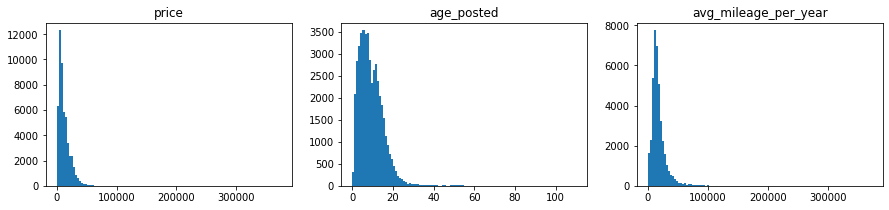

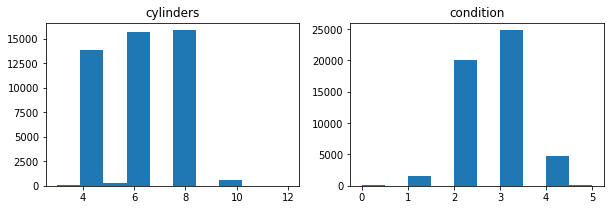

In [12]:
#Let's look at dispersion of some variables and their outlies
#function to plot several histograms in one line
def hist_in_row(data, features, bins_num=None):
    cols_num = len(features)
    fig, axes = plt.subplots(ncols=cols_num, figsize=(5*cols_num, 3))
    for i, feature in enumerate(features):
        axes[i%cols_num].hist(x=feature, data=data, bins=bins_num)
        axes[i%cols_num].set_title(feature)

#ploting corresponding histograms
hist_in_row(data, ['price', 'age_posted', 'avg_mileage_per_year'], bins_num=110) 
hist_in_row(data, ['cylinders', 'condition']) 

*On the histograms for the features `'price'`, `'age_posted'` and `'avg_mileage_per_year'` __there are inadequately large values__. There aren't many values of __price__ after __\\$50,000__, although we have a few __outliers__ ranging all the way up to __$300,000__. The most of the values of __age__ lie in the range __ending at 30 years__, although there are __outliers__ going up to __100 years__. The values of the __average mileage__ that exceed __50,000__ are rare, almost nobody takes more than 100,000, but there are single __outliers__ around __300,000__.*

*For vehicle __age__, the histogram has one __peak around 5 years old__ and another small one __around 10 years old__, or there is a gap in ads for cars between 5 and 10 years old.*

*__Most__ cars have __4, 6 or 8 cylinder engines__. There are almost no ads with other types of engines.*

*Most of the vehicles are in __good or excellent condition__.*

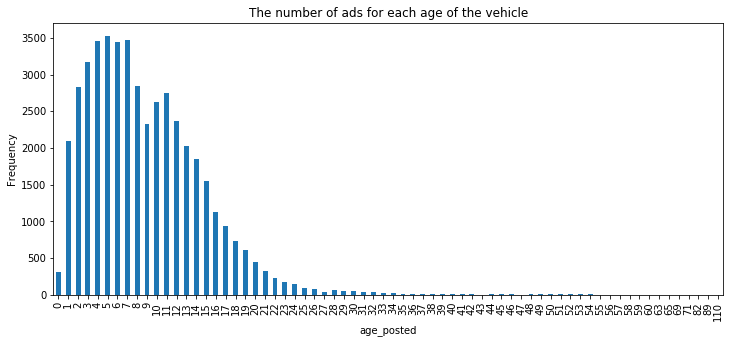

In [13]:
#Loking at number of ads for each age of the vehicle
data.groupby('age_posted').age_posted.count().plot(kind='bar', figsize=(12, 5));
plt.ylabel('Frequency');
plt.title('The number of ads for each age of the vehicle');

*The owners mainly sell cars that are more than 4-6 years old, those who are more attached to their car do it after 10 years, perhaps this is just the second sale of a car by those who bought a five-year-old car. Most likely, the first peak corresponds to the end of the warranty service, and the second peak corresponds to the service life.*

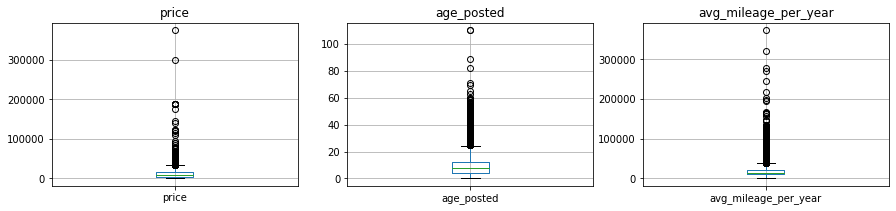

Some statistic to determine the limits of outliers:


,min,max,outliers_border
price,1.0,375000.0,34597.500000
age_posted,0.0,110.0,24.000000
avg_mileage_per_year,0.0,373200.0,38117.647059


In [14]:
#Let's take a look at where to draw the outliers boundaries.
#function to plot several boxplot in one line
def boxplot_in_row(features):
    cols_num = len(features)
    fig, axes = plt.subplots(ncols=cols_num, figsize=(5*cols_num, 3))
    for i, feature in enumerate(features):
        data.boxplot(feature, ax=axes[i%cols_num])
        axes[i%cols_num].set_title(feature)

#Loooking at boxplot graphs for features with outlies      
boxplot_in_row(['price', 'age_posted', 'avg_mileage_per_year'])
plt.show()

#function to calculate Q3+1.5IQR value
def outliers_border(series):
    Q1 = series.quantile(0.25) 
    Q3 = series.quantile(0.75) 
    IQR = Q3 - Q1 
    return Q3 + 1.5 * IQR

print(BOLD + 'Some statistic to determine the limits of outliers:' + END)
data[['price', 'age_posted', 'avg_mileage_per_year']].agg(['min', 'max', outliers_border]).T

*The __upper whisker__ of price __boxplot__ ends at __about \\$35,000__. So it's the approximate border of the "typical" range. We can set this value as a maximum limit of price. The __mininum price in \\$1 looks also inadequately__, although the lower wisker includes this value. It's necessary to look at the left side of the price distribution in more detail.*

*Let's set a border for vehicle __age__ as __25 years old__ according to the upper whisker.*

*For __average mileage__ the border can be __40,000__ rounding off the value of the corresponding upper whisker.*

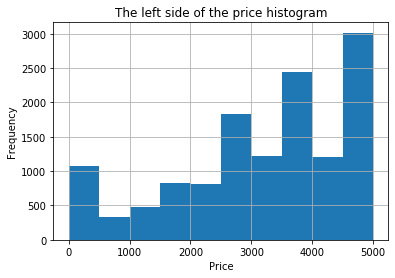

In [15]:
#Looking at the left side of the price histogram
data.price.hist(range=(0, 5000));
plt.xlabel('Price');
plt.ylabel('Frequency');
plt.title('The left side of the price histogram');

*Let's __set a minimum price as \\$500__, it looks fair. Even a little less does not look believable. We can ask experts or look at specific ads and the price of similar vehicles.*

In [16]:
#filtering out the outliers
data_filtered = data.query('500 <= price <= 35000 and age_posted < 25 and avg_mileage_per_year < 40000') 

*__Data__ with possible errors __has been filtered out__. Perhaps there were not too many errors in this data, but the price for rare cars is formed according to completely different rules.*

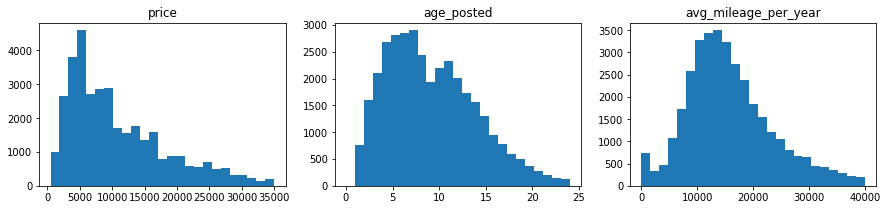

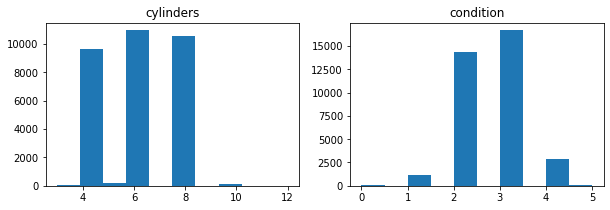

In [17]:
#ploting the histograms on filtered data
hist_in_row(data_filtered, ['price', 'age_posted', 'avg_mileage_per_year'], bins_num=25) 
hist_in_row(data_filtered, ['cylinders', 'condition']) 

*We removed the tails for the features `'price'`, `'age_posted'` and `'avg_mileage_per_year'` and the data is now not so skewed, but still has a positively skewed distribution. The readability of the histograms without outliers became better.*

*For variables `'cylinders'` and `'condition'`, nothing has changed after filtering.*

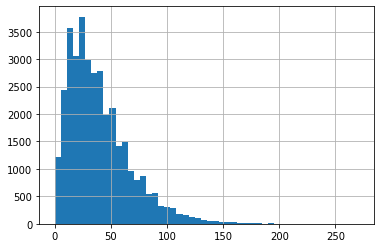

Some describe statistic of days_listed:


,min,max,mean,median,outliers_border
days_listed,0.0,271.0,39.703237,33.0,106.5


In [18]:
#Let's look at dispersion of days_listed
data_filtered.days_listed.hist(bins=50);
plt.show()

print(BOLD + 'Some describe statistic of days_listed:' + END)
data_filtered[['days_listed']].agg(['min', 'max', 'mean', 'median', outliers_border]).T

*The advertisment can be displayed __from 0 days to 9 month__. The distribution of this feature is positively skewed. So ads often do not run that long. Moreovere the average is greater than the median. Thus, 9 months is more of a outlier.*

*The __typical lifetime__ of an ad is about __a month__. Sometimes ads are __deleted on the same day__. It's a __pretty quick__ deal or the owner has changed his mind about selling the car. More than __100 days__ looks like an __abnormally long__ time.*

Number of ads and the average price for each type of vehicle:
             ads_count     avg_price
type                                
SUV          8633       10278.657477
bus          22         16921.181818
convertible  267        12754.228464
coupe        1465       13385.620478
hatchback    746        6565.384718 
mini-van     846        7518.286052 
offroad      148        14298.932432
other        168        9456.363095 
pickup       4565       14052.809639
sedan        8606       6677.054962 
truck        8103       14777.065655
van          411        8567.340633 
wagon        1149       8676.343777 


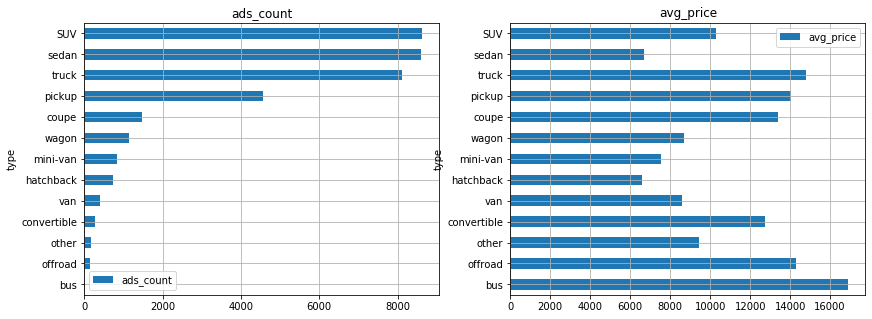

In [19]:
#Let's look at number of ads and the average price for each type of vehicle
#Calculated pivot table for vehicle types
ads_by_types = data_filtered.pivot_table(index='type', values='price', aggfunc=['count', 'mean'])
ads_by_types.columns = ['ads_count', 'avg_price'] 

print(BOLD + 'Number of ads and the average price for each type of vehicle:' + END)
print(ads_by_types)

#function to plot several barplot in one line
def barplot_in_row(data, features):
    cols_num=len(features)
    fig, axes = plt.subplots(ncols=cols_num, figsize=(7*len(features), 5))
    for i, feature in enumerate(features):
        data.plot.barh(y=feature, ax=axes[i%cols_num], grid=True)
        axes[i%cols_num].set_title(feature)

#plotting number of ads and the average price for each type of vehicle
barplot_in_row(ads_by_types.sort_values('ads_count'), ['ads_count', 'avg_price'])

*The __most popular__ ads sell __SUV__ and __sedans__, with pekups just a little behind them. Although peckups are so similar to trucks,  so this type of vehicle is especially popular. Apparently this is some local specific feature of the market.*

*The price categories of these most popular types of machines are very different. Sedans have the lowest price, pekups and trucks have almost the highest price, and the CUV are in between. Prices for other vehicles fluctuate within these limits. The bus price is the highest, the hatchback's price is comparable to the sedan's one and is the lowest.*

SUV


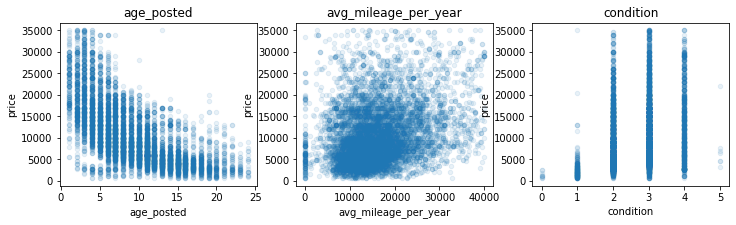

Correlation of the age and the avg mileage with the price:
age_posted             -0.661517
avg_mileage_per_year    0.299605
condition               0.285545
Name: price, dtype: float64


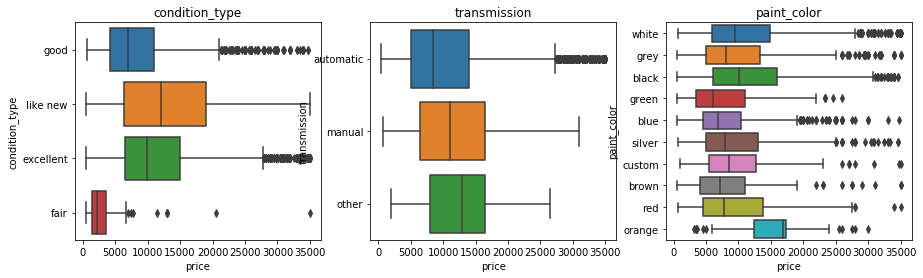

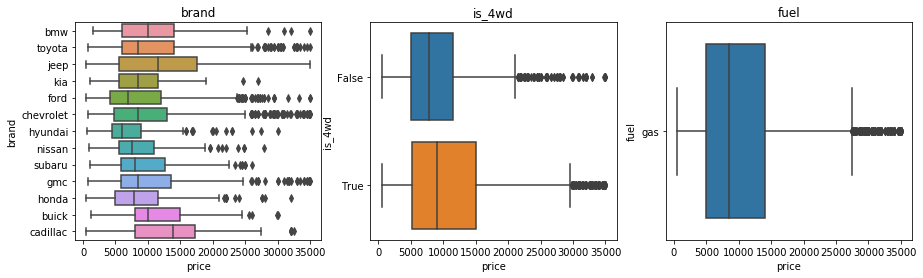


sedan


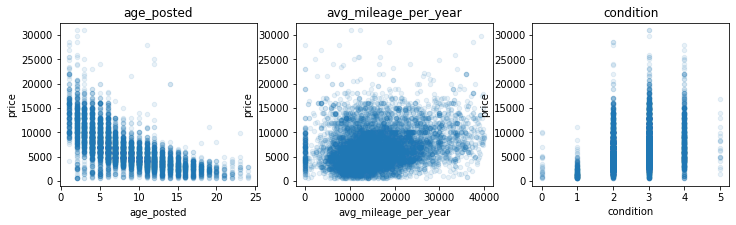

Correlation of the age and the avg mileage with the price:
age_posted             -0.680848
avg_mileage_per_year    0.234338
condition               0.302786
Name: price, dtype: float64


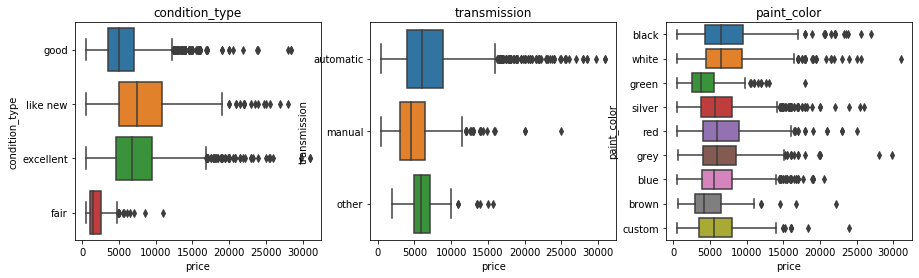

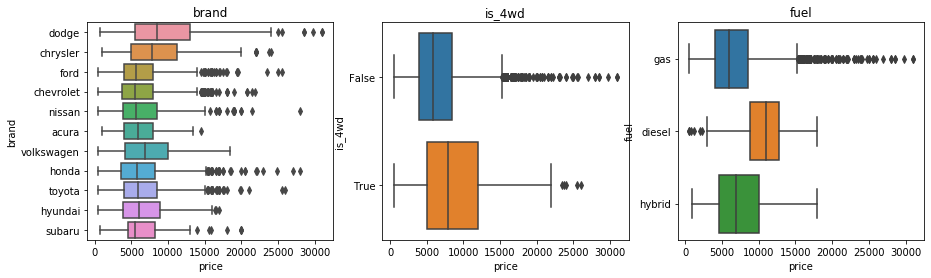

In [20]:
#Let's look at the factors affect the price for two groups of the most popular types of cars.
#Getting data slice for SUV and sedan
data_with2type = data_filtered.query('type in ["SUV", "sedan"]')\
    .merge(condition_dictionary, left_on='condition', right_on='id')

#function to remove small observation numbers in the group by categories
def remove_small_observation_num(data, category, feature, threshold=50):
    cat_filtered = data.pivot_table(index=category, values=feature, aggfunc='count').query(feature+'>50').index
    return data.query(category+' in @cat_filtered')

#function to plot scatter graphs in a line
def scatter_in_row(data, feature, features):
    cols_num=len(features)
    fig, axes = plt.subplots(ncols=cols_num, figsize=(4*len(features), 3))
    for i in range(len(features)):
        data.plot(x=features[i], y=feature, ax=axes[i%cols_num], kind='scatter', alpha=0.1)
        axes[i%cols_num].set_title(features[i])

#function to plot boxplot by categorical feature in a line
def boxplot_by_cat_in_row(data, feature, features):
    cols_num=len(features)
    fig, axes = plt.subplots(ncols=cols_num, figsize=(5*len(features), 4))
    for i, category in enumerate(features):
        sns.boxplot(y=category, x=feature,\
                    data=remove_small_observation_num(data, category, feature),\
                    ax=axes[i%cols_num], orient='h');
        axes[i%cols_num].set_title(category)

#Plotting appropriate graphs and calculation of correlation coefficients for each types of car
for name, group_data in data_with2type.groupby('type'):
    print(BOLD + name + END)
    scatter_in_row(group_data, 'price', ['age_posted', 'avg_mileage_per_year', 'condition'])
    plt.show()
    
    print(BOLD + 'Correlation of the age and the avg mileage with the price:' + END)
    print(group_data[['price', 'age_posted', 'avg_mileage_per_year', 'condition']].corr().price[1:])
    
    boxplot_by_cat_in_row(group_data, 'price', ['condition_type', 'transmission', 'paint_color'])
    boxplot_by_cat_in_row(group_data, 'price', ['brand', 'is_4wd', 'fuel'])
    plt.show()
    print()

*For both types of cars, there is an inverse relationship between age and price (see scatterplot, and the correlation cofficient is -0.7). Moreover, in the first five years, the decline is more significant than in the remaining time. In addition, there are cars with a fairly low price for any age of the car, this is most likely due to the poor condition of the car.*

*The price fluctuates a lot for all average mileages for both types of cars. And no dependence can be traced on the scatterplots. For sedans, there is a very high price for single ads. For SUV there are many expensive and many cheap cars at the same time, most likely in this case the condition and additional characteristics of the car is important. Cars with zero mileage will lag separately.*

*For both types of cars, cars with "fair" condition are much cheaper than others (see boxplot for price by condition_types). Among the SUV, cars with a condition "like new" stand out for their price (see boxplot). If we consider the condition as a numerical parameter, then we can see the relationship between the condition and the price in the scatter plot, but it is diffused and not linear. There are many points with a low price for cars in good condition, most likely this is due to the brand of the car originally from a lower segment or the unpopular color of the car. It's strange that new cars are cheaper. Perhaps the brand is from a cheaper price category or they have poorer equipment than expensive cars with good condition.*

*For SUV, cars with automatic transmission on average are slightly cheaper.*

*For SUV, orange cars are also distinguished by price: on average, they have a higher price. Among the sedans, green cars are slightly cheaper.*

*Among SUVs such brands as Jeep and Cadillac can be distinguished, they are on average slightly more expensive. Dodge and Chrysler stand out for sedans. Hyundai is in opposite a little bit cheeper among SUVs and for sedans Subaru is slightly cheeper then others.*

*The presence of four-wheel drive does not significantly affect the value of the price for both groups.*

*The price of gas sedans is significantly higher than the prices of cars with a gasoline or hybrid engine. For SUVs, there is enough data only for gas vehicles.*

<a id='section5'></a>
## 5. Overall conclusion

There are data of free advertisements from Internet car market to further assess the impact of various vehicle characteristics on its price. 

Before proceeding to the analysis, the data was preprocessed. 

After a general review of the data revealed:
* column corresponding to the presence of four-wheel drive has 50% unknown values that can be filled using some assumptions
* some features have unknown values that cannot be restored from other fields
* there are inadequately low and high prices
* surprisingly old cars
* columns with excess types

It makes sense to contact the developer who sent the source file to clarify possible reasons for gaps: perhaps these are just optional fields or it was an error.

The missing values in the column is_4wd were filled in according to the assamption that the value is skipped only for cars without 4WD.
The excess types were converted to appropriate ones.

Some additional characteristics were calculated, such as vehickle age at the time of ad placing or average mileage, required for further analysis.

The distributions of features with odd values were considered and limits of outliers were determined to filter them out. Prices less than \\$500 and more than $35,000 have been filtered. Ads with a vehicle age less than 25 years old and average mileage less 40,000 were left. 

The typical ad lifetime was analyzed. On average, an ad is on the site for about a month. Sometimes ads are deleted on the same day. Some ads are on the site for up to 9 months.

For each type of vehicle the number of ads and the average price were explored. Most of the ads are for the sale of SUV and sedans. Peckups and trucks form the next big ad group. The price categories of these most popular types of machines are very different. Sedans have the lowest price, pekups and trucks have the highest price after bus price, and the CUV are in between. Prices for other vehicles vary within these limits. 

Factors impacting the price were determied:
* there is an inverse relationship between age and price for both SUVs and sedans, in the first five years, the decline in price is more significant than in the remaining time
* for different conditions of the car, the price is different, so for a "fair" condition the price is much lower than for a "good", "excellent" or "like new" condition for both SUVs and sedans, among the SUV, cars with a condition "like new" stand out for their price
* for SUV, cars with automatic transmission on average are slightly cheaper
* on average orange SUVs have a higher price, green sedans are in opposite slightly cheaper than the rest
* among SUVs brands Jeep and Cadillac are on average slightly more expensive, Hyundai is in opposite a little bit cheeper; Dodge and Chrysler have higher price among sedans, Subaru is slightly cheeper then others.
* among sedans the prices with gas fuel is significantly higher than the prices of cars with a gasoline or hybrid engine

It seems that there is some relation between considered features and vehicle price. But it is necessary to look at the statistical significance of all revealed differences.